In [4]:
# API Key: {"username":"karthikannigeri","key":"7c17d56fd1a735e44f8e3a4f237a87d7"}

import importlib.util
if importlib.util.find_spec('kaggle') is None:
  !pip install kaggle
# !mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
if importlib.util.find_spec('wbdata') is None:
  !pip install wbdata
import wbdata as wb

import os
os.environ['KAGGLE_USERNAME'] = 'karthikannigeri'
os.environ['KAGGLE_KEY'] = '7c17d56fd1a735e44f8e3a4f237a87d7'

from kaggle import api
import pandas as pd
import matplotlib.pyplot as plt

api.dataset_download_files('tianhwu/brooklynhomes2003to2017', path='./home_price_dataset/', unzip=True)

Original columns: ['Unnamed: 0', 'borough', 'neighborhood', 'building_class_category', 'tax_class', 'block', 'lot', 'easement', 'building_class', 'address', 'apartment_number', 'zip_code', 'residential_units', 'commercial_units', 'total_units', 'land_sqft', 'gross_sqft', 'year_built', 'tax_class_at_sale', 'building_class_at_sale', 'sale_price', 'sale_date', 'year_of_sale', 'Borough', 'CD', 'CT2010', 'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCent', 'HealthArea', 'SanitBoro', 'SanitDistr', 'SanitSub', 'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 

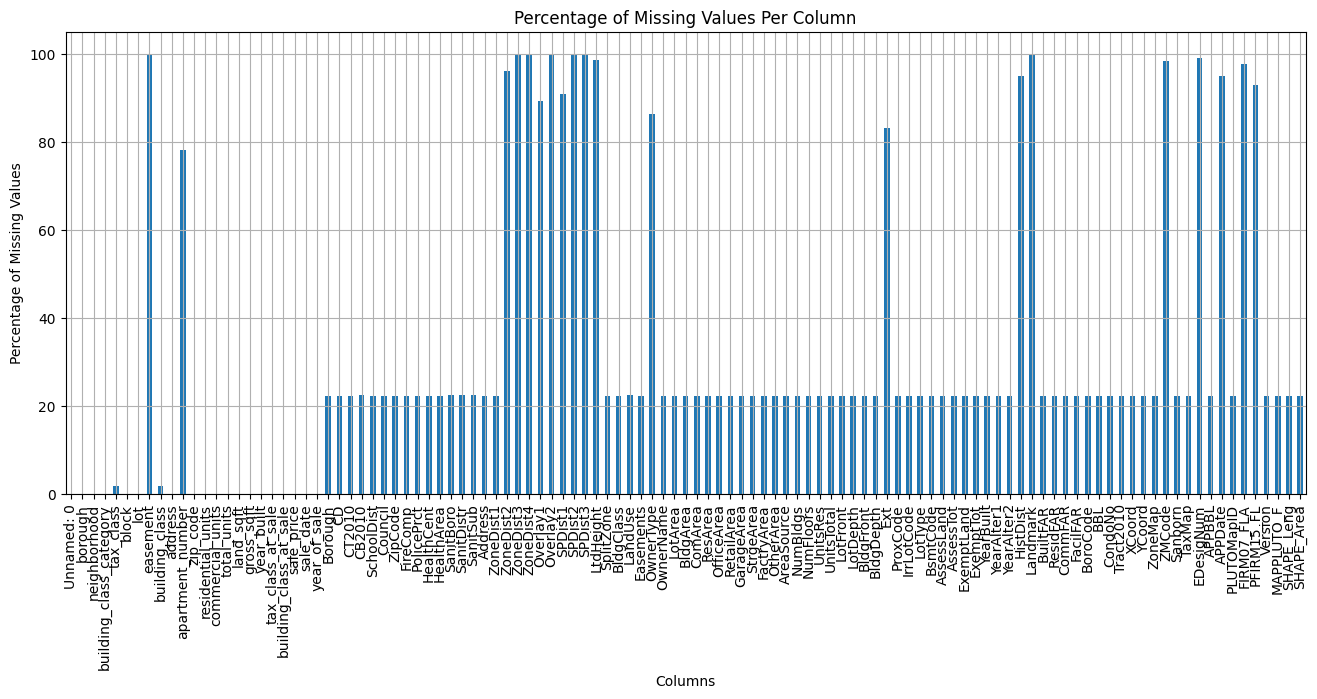

Dropped columns due to >30% missing values: ['easement', 'apartment_number', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'OwnerType', 'Ext', 'HistDist', 'Landmark', 'ZMCode', 'EDesigNum', 'APPDate', 'FIRM07_FLA', 'PFIRM15_FL']
Additionally dropped columns: ['Version', 'MAPPLUTO_F', 'SHAPE_Area', 'SHAPE_Leng', 'PLUTOMapID', 'APPBBL']
Updated DataFrame shape after dropping rows with missing values: (301220, 85)
No missing values found in the DataFrame.

Updated DataFrame shape after dropping columns with unecessary info: (301220, 60)
Index(['Unnamed: 0', 'neighborhood', 'building_class_category', 'tax_class', 'zip_code', 'residential_units', 'commercial_units', 'total_units',
       'land_sqft', 'gross_sqft', 'year_built', 'tax_class_at_sale', 'building_class_at_sale', 'sale_price', 'sale_date', 'year_of_sale', 'CD',
       'SchoolDist', 'Council', 'ZipCode', 'PolicePrct', 'HealthCent', 'HealthArea', 'SanitDistr', 'ZoneDist

In [15]:
df = pd.read_csv('./home_price_dataset/brooklyn_sales_map.csv', low_memory=False)
# df = pd.read_csv('./brooklyn_sales_map.csv', low_memory=False)

# Print the names of all columns and the initial shape of the DataFrame
print("Original columns:", df.columns.tolist())
print("Original DataFrame shape:", df.shape)

# Set the display option to show all columns (None means no limit)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.width', 150)
print(df.columns)

# Calculate the percentage of missing values for each column
missing_percent = df.isnull().mean() * 100

# Plotting the percentage of missing values for each column as a bar chart
plt.figure(figsize=(16, 6))
missing_percent.plot(kind='bar')
plt.title('Percentage of Missing Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.grid(True)
plt.show()

# Identify columns with more than 30% missing values
columns_to_drop = missing_percent[missing_percent > 30].index.tolist()

# Drop these columns
df.drop(columns=columns_to_drop, inplace=True)

# Print the names of the dropped columns due to high missing values
print("Dropped columns due to >30% missing values:", columns_to_drop)

# Manually specify additional columns to drop
# related to dataset info, or no documention for column meaning
additional_columns_to_drop = ['Version', 'MAPPLUTO_F', 'SHAPE_Area', 'SHAPE_Leng', 'PLUTOMapID', 'APPBBL']

# Check if the manually specified columns to drop exist in the DataFrame
additional_columns_to_drop = [col for col in additional_columns_to_drop if col in df.columns]

# Drop the specified additional columns
df.drop(columns=additional_columns_to_drop, inplace=True)

# Print the names of manually dropped columns
print("Additionally dropped columns:", additional_columns_to_drop)

# Remove all rows with any remaining missing values
df.dropna(inplace=True)

# Print the updated DataFrame shape to confirm rows have been dropped
print("Updated DataFrame shape after dropping rows with missing values:", df.shape)

# Check that there are no missing values in the DataFrame
if df.isnull().any().any():
    print("There are missing values in the DataFrame.")
else:
    print("No missing values found in the DataFrame.")

# Additional columns to drop
# Commented columns already dropped by above data cleaning
additional_cols_to_drop=[
    'borough', # all have value 3, number stands for Brooklyn
    'building_class', #duplicate with 'building_class_category'
    'address', #categorical, location related, address string does not impact price
    'Address', #duplicate of address
    # 'apartment_number', #mixed numerical + categorical
    'Easements', #duplicate
    'Borough', #duplicate
    'CT2010', #categorigcal, location related
    'CB2010', #categorigcal, location related
    'Tract2010', #duplicate
    'BoroCode', #duplicate
    'CondoNo', #information captured in other cols
    'ProxCode', #information captured in other cols
    'OwnerName', #does not impact price
    'BldgClass',#duplicate
    # 'ZoneDist3', #significant fraction of NA
    # 'ZoneDist4', #significant fraction of NA
    'YearBuilt', #duplicate
    # 'ZMCode', #information captured in other cols
    # 'SPDist2', #information captured in zip code column
    # 'SPDist3', #information captured in zip code column
    'AreaSource', #related to dataset information
    'block', #location related, location handled through zip code
    'lot', #location related, location handled through zip code
    'BBL', #location related, location handled through zip code
    'Sanborn', #location related, location handled through zip code
    'SanitBoro', #location related, location handled through zip code
    'SanitSub', #location related, location handled through zip code
    'SplitZone', #location related, location handled through zip code
    'FireComp', #location related, location handled through zip code
    'ZoneMap', #location related, location handled through zip code
]
df = df.drop(columns=additional_cols_to_drop, axis=1)

# Print the updated DataFrame shape to confirm rows have been dropped
print("\nUpdated DataFrame shape after dropping columns with unecessary info:", df.shape)
print(df.columns)

Shape of numerical data: (301220, 53)
Shape of categorical data: (301220, 7)


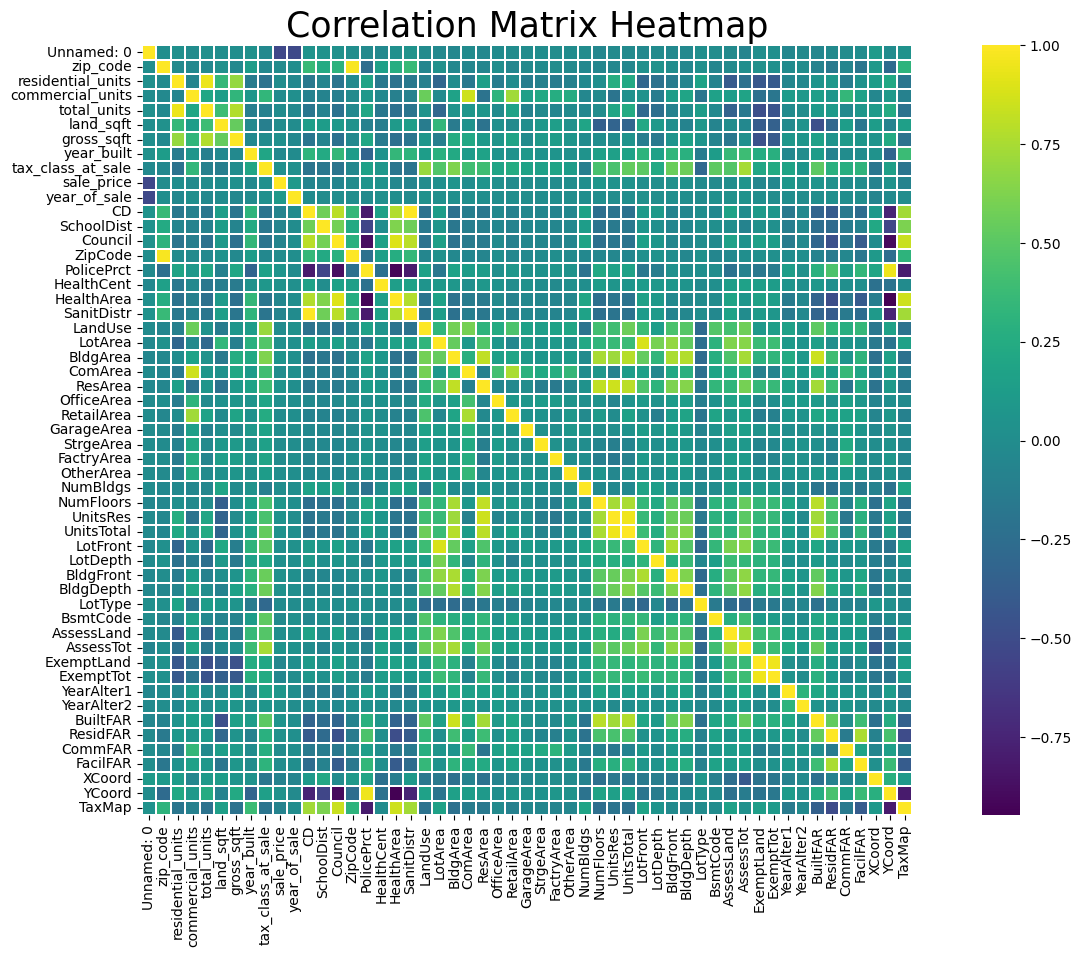

{'UnitsTotal', 'total_units', 'SanitDistr', 'ExemptTot', 'HealthArea', 'ZipCode'}
   Unnamed: 0  zip_code  residential_units  commercial_units  land_sqft  gross_sqft  year_built  tax_class_at_sale   sale_price  year_of_sale  ...  \
1           2     11201                  0                 0   134988.0         0.0           0                  4  345000000.0          2016  ...   
2           3     11201                  0                 0    32000.0    304650.0        1924                  4  340000000.0          2016  ...   
3           4     11234                  0               123   905000.0   2548000.0        1970                  4  276947000.0          2012  ...   
4           5     11201                  0                 1    20267.0    356000.0        1927                  4  202500000.0          2017  ...   
5           6     11249                  0                 0    57600.0         0.0           0                  4  185445000.0          2012  ...   

   ExemptLand  Ye

In [16]:
# Identify highly correlated features using the correlation matrix:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(exclude=['object'])
df_categorical = df.select_dtypes(include=['object','category'])

print("Shape of numerical data:", df_numeric.shape)
print("Shape of categorical data:", df_categorical.shape)

corr_matrix = df_numeric.corr(method='spearman') # Use this method as dataset is not normally distributed and has outliers

plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, cmap='viridis', linewidths=0.1, linecolor='white', square=True)
plt.title('Correlation Matrix Heatmap', fontsize=25)
plt.show()

cols_to_drop = set()

for j, col in enumerate(df_numeric.columns):
    for i in range(j+1, len(df_numeric.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9 and df_numeric.columns[i] not in ['YCoord', 'Unnamed: 0']:
            cols_to_drop.add(df_numeric.columns[i])

#df = df.drop(columns=cols_to_drop)
print(cols_to_drop)
df_numeric = df_numeric.drop(columns=cols_to_drop)
print(df_numeric.head())
print(df_numeric.columns)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Create the 'latest_year_alteration' column
if 'YearAlter1' in df_numeric.columns and 'YearAlter2' in df_numeric.columns:
  df_numeric['latest_year_alteration'] = df_numeric[['YearAlter1', 'YearAlter2']].max(axis=1)
  df_numeric = df_numeric.drop(columns=['YearAlter1', 'YearAlter2'], axis=1)

# Step 2: Calculate the mean sale price for each cluster
df_numeric['mean_sale_price'] = df_numeric.groupby('zip_code')['sale_price'].transform('mean')
# Step 3: Rank the clusters based on the mean sale price
# We will use dense ranking so no gaps are created in rank when there are ties
df_numeric['zip_code_rank'] = df_numeric['mean_sale_price'].rank(method='dense', ascending=False).astype(int)
# Optionally, you can drop the 'cluster' and 'mean_sale_price' columns if they're not needed
df_numeric = df_numeric.drop(['mean_sale_price'], axis=1)

In [18]:
# Create the 'years_since_built' column
df_numeric = df_numeric[df_numeric['year_built'] != 0]
df_numeric = df_numeric[df_numeric['year_of_sale'] != 0]
df_numeric['years_since_built'] = df_numeric['year_of_sale'] - df_numeric['year_built']

# For 'years_since_last_alteration', we replace 0 in 'latest_year_alteration' with 'year_built' values directly
# Identify rows where 'latest_year_alteration' is 0 and update them
mask = df_numeric['latest_year_alteration'] == 0.0
df_numeric.loc[mask, 'latest_year_alteration'] = df_numeric.loc[mask, 'year_built']
# Now, create the 'years_since_last_alteration' column
df_numeric['years_since_last_alteration'] = df_numeric['year_of_sale'] - df_numeric['latest_year_alteration']

df_numeric['years_since_sold'] = 2018 - df_numeric['year_of_sale']

if 'latest_year_alteration' in df_numeric.columns:
  df_numeric = df_numeric.drop(['latest_year_alteration'], axis=1)

if 'year_of_sale' in df_numeric.columns:
  df_numeric = df_numeric.drop(['year_of_sale'], axis=1)

# Print the shapes of the numerical and categorical data frames
print("Shape of numerical data:", df_numeric.shape)
print("Shape of original categorical data:", df_categorical.shape)

# Third: Handle numerically-coded categories
# List the names of numerically-coded categorical columns
numerically_coded_categories = ['zip_code','building_class_at_sale','tax_class','tax_class_at_sale','CT2010','CB2010','SchoolDist','Council','FireComp',\
                                'PolicePrct','neighborhood','HealthCent','HealthArea','SanitBoro','ZipCode','SanitDistr','Easements',\
                                'LandUse','SanitDist','SanitSub','Address','ZoneDist1','ZoneDist2','ZoneDist3','ZoneDist4','Overlay1','Overlay2',\
                                'SPDist1','SPDist2','SPDist3','LtdHeight','SplitZone','BldgClass','OwnerType','OwnerName','AreaSource','Ext','ProxCode',\
                                'IrrLotCode','LotType','BsmtCode','HistDist','Landmark','BoroCode','BBL','CondoNo','Tract2010','ZMCode','Sanborn','TaxMap',\
                                'PFIRM15_FL', 'FIRM07_FLA','EDesigNum','CD','block','lot']

other_categorical_cols = ['PFIRM15_FL', #flood information related, categorical with lots of NAs
                          'FIRM07_FLA', #flood information related, categorical with lots of NAs
                          'EDesigNum', #hazardous substances related, categorial with lots of NAs
                          'neighborhood', #categorial, within Brooklyn
                          'building_class_category', # residential or commercial
                          'tax_class',
                          'tax_class_at_sale',
                          'building_class_at_sale',
                          'block', # related to zip code and location
                          'lot', #categorical, but with >1000 options, not useful
                          'CD', #community district, location related
                          'ZipCode', #location related, need to handle carefully
                          'ZoneDist1', #location related
                          'ZoneDist2', #location related
]

# Filter out the columns that exist in the numerical DataFrame
existing_numerically_coded_categories = [col for col in numerically_coded_categories if col in df_numeric.columns]

# Create a new DataFrame for these numerically-coded categorical columns
numerically_coded_categories_df = df_numeric[existing_numerically_coded_categories]

# Remove these columns from the numerical DataFrame
df_numeric.drop(columns=existing_numerically_coded_categories, inplace=True)

# Print the updated shapes to compare
print("Updated shape of numerical DataFrame (after moving categories):", df_numeric.shape)
print("Shape of numerically-coded categories DataFrame:", numerically_coded_categories_df.shape)

# Print updates to check the work
print("Numerically-coded categories moved to a separate DataFrame:", existing_numerically_coded_categories)

print("\n")
print(df_numeric.head())
print(df_numeric.columns)

Shape of numerical data: (293987, 48)
Shape of original categorical data: (301220, 7)
Updated shape of numerical DataFrame (after moving categories): (293987, 37)
Shape of numerically-coded categories DataFrame: (293987, 11)
Numerically-coded categories moved to a separate DataFrame: ['zip_code', 'tax_class_at_sale', 'SchoolDist', 'Council', 'PolicePrct', 'HealthCent', 'LandUse', 'LotType', 'BsmtCode', 'TaxMap', 'CD']


   Unnamed: 0  residential_units  commercial_units  land_sqft  gross_sqft  year_built   sale_price   LotArea   BldgArea    ComArea  ...  BuiltFAR  \
2           3                  0                 0    32000.0    304650.0        1924  340000000.0   32000.0   304650.0   304650.0  ...      9.52   
3           4                  0               123   905000.0   2548000.0        1970  276947000.0  905000.0  2548000.0  2548000.0  ...      2.82   
4           5                  0                 1    20267.0    356000.0        1927  202500000.0   20267.0   356000.0    30000.

In [19]:
categorical_cols = df_categorical.columns

# Add "Unnamed: 0" to the Index
categorical_cols_updated = categorical_cols.union(['Unnamed: 0'])
categorical_cols_updated = categorical_cols_updated.union(existing_numerically_coded_categories)
df_categorical = df[categorical_cols_updated]

print(df_categorical.columns)
print(df_categorical.columns.shape)

print(df_numeric.columns)
print(df_numeric.columns.shape)

df_joined = pd.merge(df_categorical, df_numeric, how='inner', on='Unnamed: 0')

# sale_price between 20000.0 and 200000000.0 printed for dataframe 04_23

df_joined = df_joined[df_joined['sale_price'] >= 20000.0]
df_joined = df_joined[df_joined['sale_price'] <= 200000000.0]
df_joined = df_joined[df_joined['land_sqft'] >= 10.0]

print(df_joined.shape)
print(df_joined['sale_price'].describe())
print(df_joined['land_sqft'].describe())

Index(['BsmtCode', 'CD', 'Council', 'HealthCent', 'IrrLotCode', 'LandUse', 'LotType', 'PolicePrct', 'SchoolDist', 'TaxMap', 'Unnamed: 0',
       'ZoneDist1', 'building_class_at_sale', 'building_class_category', 'neighborhood', 'sale_date', 'tax_class', 'tax_class_at_sale', 'zip_code'],
      dtype='object')
(19,)
Index(['Unnamed: 0', 'residential_units', 'commercial_units', 'land_sqft', 'gross_sqft', 'year_built', 'sale_price', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors', 'UnitsRes',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'AssessLand', 'AssessTot', 'ExemptLand', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR',
       'XCoord', 'YCoord', 'zip_code_rank', 'years_since_built', 'years_since_last_alteration', 'years_since_sold'],
      dtype='object')
(37,)
(144055, 55)
count    1.440550e+05
mean     9.177508e+05
std      2.537971e+06
min      2.000000e+04
25%   

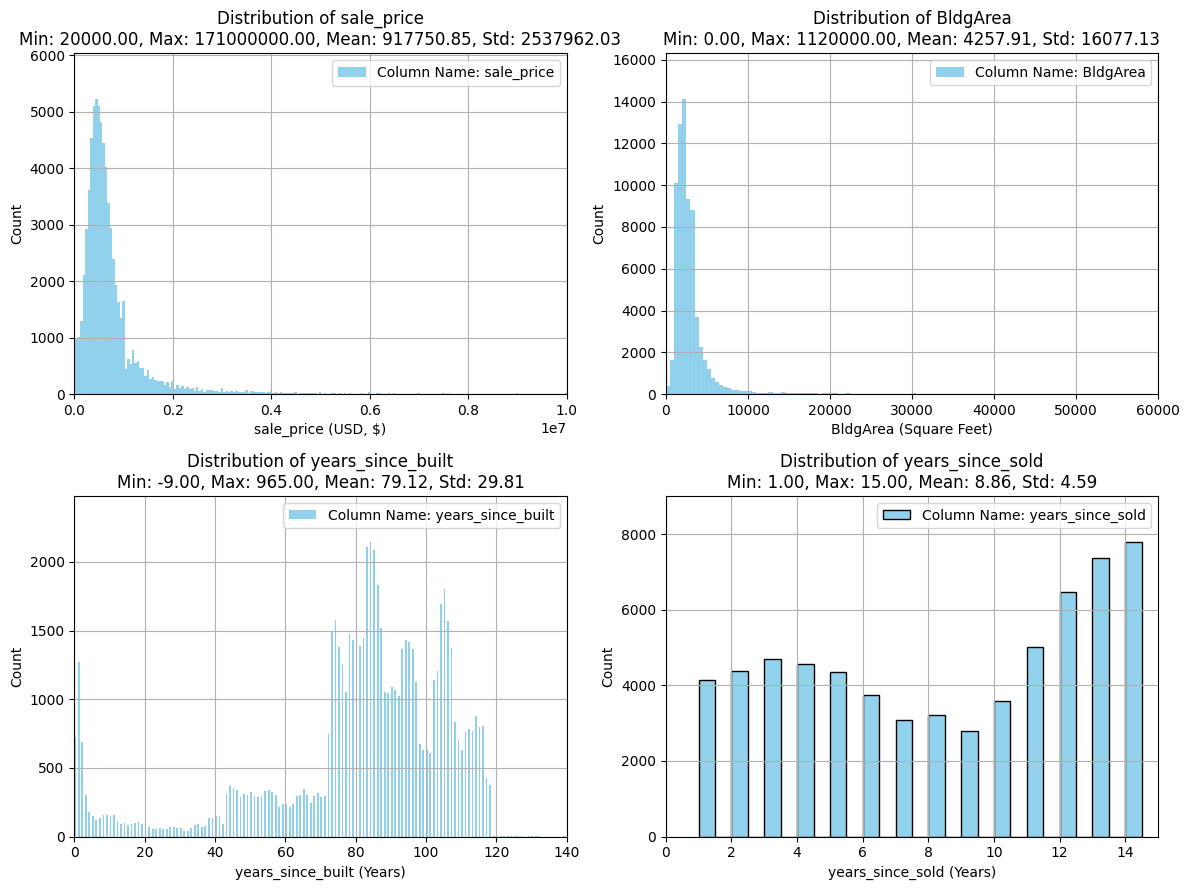

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

use_sample = True  # Set to False if you want to use the full dataset
# Select 1/100th of the data randomly if use_sample is True
if use_sample:
    sampled_df = df_joined.sample(frac=0.5, random_state=42)  # Random state for reproducibility
else:
    sampled_df = df_joined  # Use the entire dataset

cols_to_print = ["sale_price", 'BldgArea', 'years_since_built', 'years_since_sold']
units = ["(USD, $)", "(Square Feet)", "(Years)", "(Years)"]

num_plots = len(cols_to_print)
rows = int(np.ceil(num_plots / 2))  # Number of rows of subplots, aiming for 3 columns

plt.figure(figsize=(12, 9))  # Adjust overall figure size as needed

plot_lim_x_max = [1.0e7, 60e3, 140, 15]
bin_widths = [50000, 500, 0.5, 0.5]  # Adjust bin widths as needed

data_colors = ['skyblue', 'salmon']  # Colors for data lines

for i, column in enumerate(cols_to_print):
    plt.subplot(rows, 2, i+1)  # Create a subplot for each column

    # Drop missing values before creating histogram
    column_data = sampled_df[column].dropna()

    hist = sns.histplot(sampled_df[column], kde=False, stat="count", label='Column Name: ' + str(column), \
                        bins=np.arange(column_data.min(), column_data.max(), bin_widths[i]), \
                        color=data_colors[0], alpha=0.9, edgecolor='black')
    plt.xlabel(column + " " + str(units[i]))
    # Overlay a normal distribution curve
    mean, std = norm.fit(df_joined[column])  # Fit a normal distribution to the data
    # x = np.linspace(sampled_df[column].min(), sampled_df[column].max(), 100)
    # p = norm.pdf(x, mean, std)  # Probability density function for the normal distribution
    # plt.plot(x, p, 'k--', linewidth=2, label='Normal Distribution')
    plt.title(f'Distribution of {column}\nMin: {df_joined[column].min():.2f}, Max: {df_joined[column].max():.2f}, Mean: {mean:.2f}, Std: {std:.2f}')
    plt.legend()
    plt.grid(True)  # Turn on grid
    plt.xlim(left=0, right=plot_lim_x_max[i])  # Adjust x-axis limits
    plt.ylim(bottom=0, top= (hist.get_ylim()[1] * 1.1) )  # Adjust y-axis limits, assuming counts cannot be negative

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

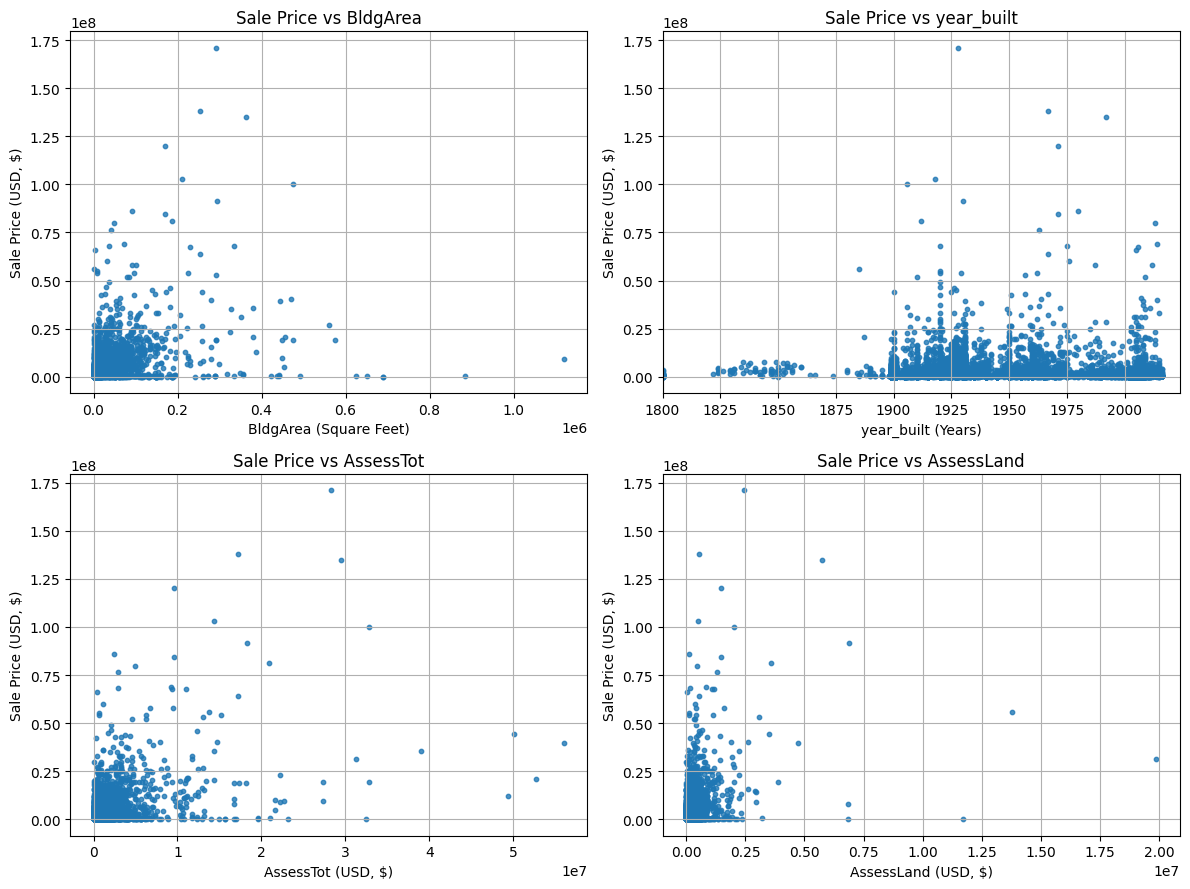

In [21]:
# Columns to plot
cols_to_print = ['BldgArea', 'year_built', "AssessTot", "AssessLand"]

# Units for each column
units = ["(Square Feet)", "(Years)", "(USD, $)", "(USD, $)"]

# Number of plots and rows
num_plots = len(cols_to_print)
rows = int(np.ceil(num_plots / 2))

# Figure size
plt.figure(figsize=(12, 9))

# Loop through each column
for i, column in enumerate(cols_to_print):
    plt.subplot(rows, 2, i + 1)  # Create a subplot for each column

    # Scatter plot
    plt.scatter(sampled_df[column], sampled_df['sale_price'], alpha=0.8, s=10)

    # Title and labels
    plt.title(f'Sale Price vs {column}')
    plt.xlabel(column + " " + units[i])
    plt.ylabel("Sale Price (USD, $)")

    if (column == 'year_built'):
        plt.xlim(left=1800, right=2024)

    # Grid
    plt.grid(True)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

<ipython-input-22-f578a42b03e5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='zip_code', y="sale_price", data=data, palette=color_palette, whis=whis, fliersize=f_size)


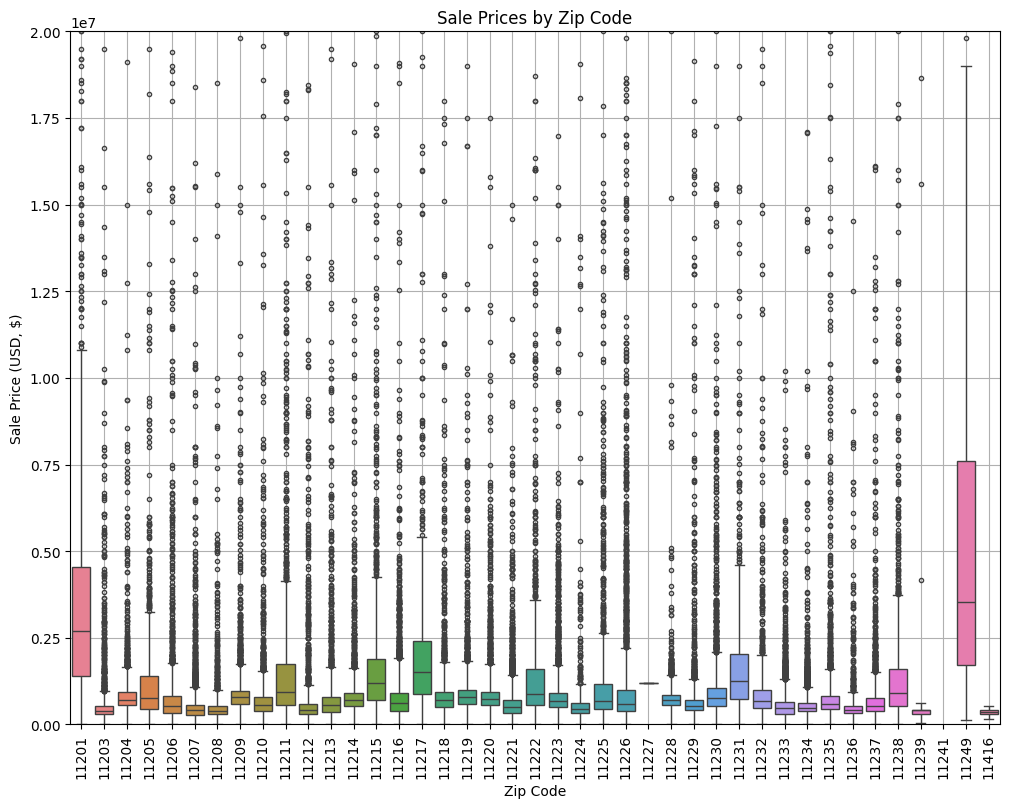

<ipython-input-22-f578a42b03e5>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighborhood', y="sale_price", data=data, palette=color_palette, whis=whis, fliersize=f_size)


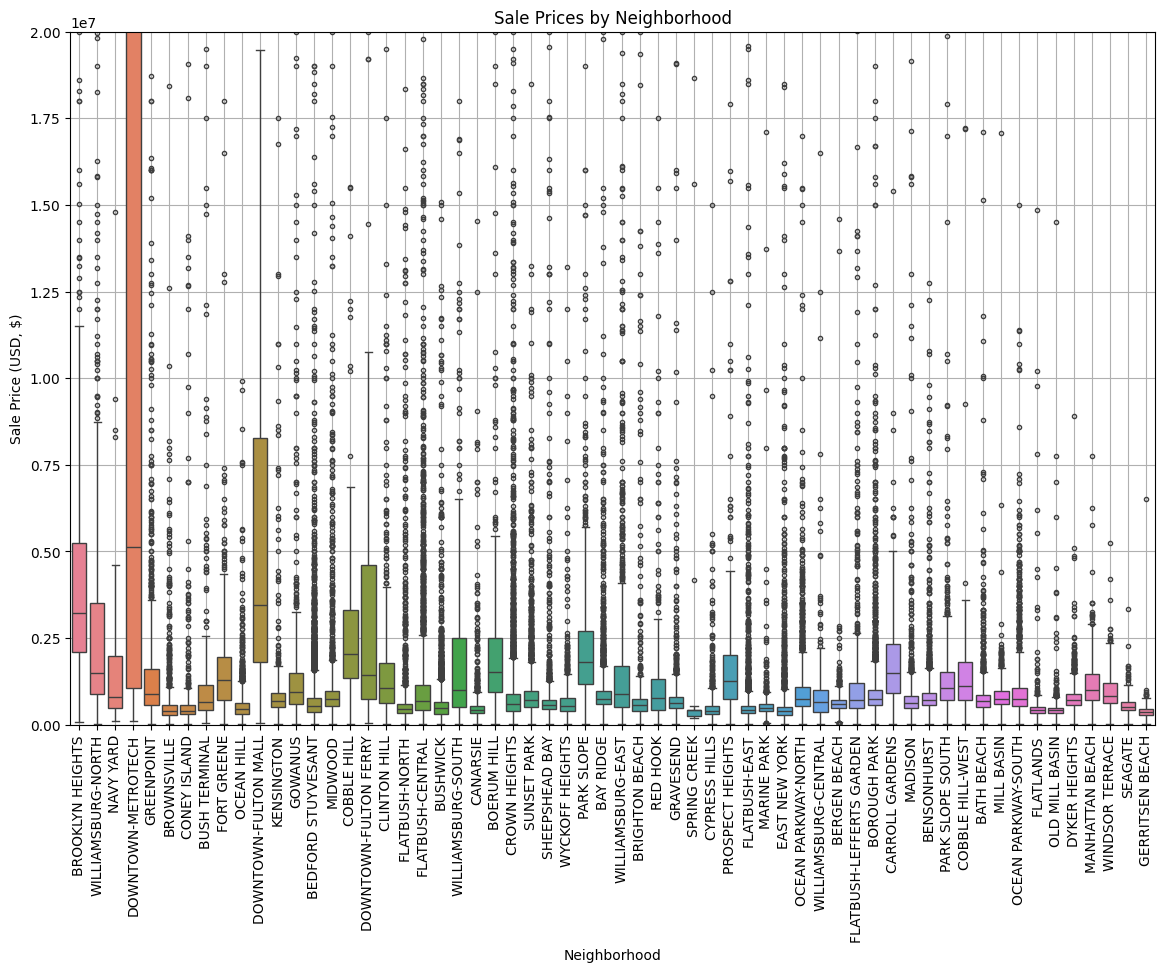

<ipython-input-22-f578a42b03e5>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var_to_plot, y='sale_price', data=data, palette=color_palette, whis=whis, fliersize=f_size)


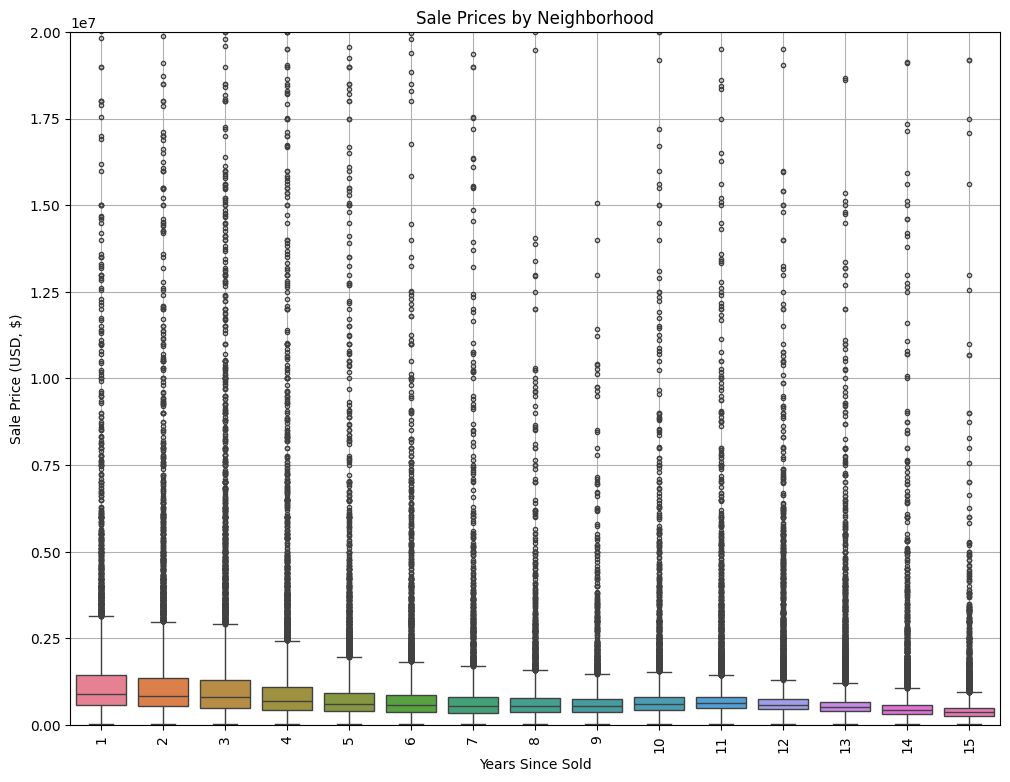

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df_joined_box_plot = df_joined[df_joined['sale_price'] <= 10000000.0]
df_joined_box_plot = df_joined

data = pd.concat([df_joined_box_plot['sale_price'], df_joined_box_plot['zip_code']], axis=1)

f_size = 3
whis = 2

# Create custom color palette
unique_zipcodes = data['zip_code'].unique()
num_zipcodes = len(unique_zipcodes)
color_palette = sns.color_palette("husl", num_zipcodes)

# Create boxplot
plt.figure(figsize=(12, 9))
sns.boxplot(x='zip_code', y="sale_price", data=data, palette=color_palette, whis=whis, fliersize=f_size)
plt.ylim(0, 20000000)  # Set y-axis limits
plt.xlabel('Zip Code')  # X-axis label
plt.ylabel('Sale Price (USD, $)')  # Y-axis label
plt.title('Sale Prices by Zip Code')  # Plot title
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)  # Turn on grid
plt.show()

data = pd.concat([df_joined_box_plot['sale_price'], df_joined_box_plot['neighborhood']], axis=1)

# Create custom color palette
unique_zipcodes = data['neighborhood'].unique()
num_zipcodes = len(unique_zipcodes)
color_palette = sns.color_palette("husl", num_zipcodes)

# Create boxplot
plt.figure(figsize=(14, 9))
sns.boxplot(x='neighborhood', y="sale_price", data=data, palette=color_palette, whis=whis, fliersize=f_size)
plt.ylim(0, 20000000)  # Set y-axis limits
plt.xlabel('Neighborhood')  # X-axis label
plt.ylabel('Sale Price (USD, $)')  # Y-axis label
plt.title('Sale Prices by Neighborhood')  # Plot title
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)  # Turn on grid
plt.show()

var_to_plot = 'years_since_sold'
data = pd.concat([df_joined_box_plot['sale_price'], df_joined_box_plot[var_to_plot]], axis=1)

# Create custom color palette
unique_zipcodes = data[var_to_plot].unique()
num_zipcodes = len(unique_zipcodes)
color_palette = sns.color_palette("husl", num_zipcodes)

# Create boxplot
plt.figure(figsize=(12, 9))
sns.boxplot(x=var_to_plot, y='sale_price', data=data, palette=color_palette, whis=whis, fliersize=f_size)
plt.ylim(0, 20000000)  # Set y-axis limits
plt.xlabel('Years Since Sold')  # X-axis label
plt.ylabel('Sale Price (USD, $)')  # Y-axis label
plt.title('Sale Prices by Neighborhood')  # Plot title
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)  # Turn on grid
plt.show()

In [23]:
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np

# Assuming df_joined is your DataFrame and it contains 'sale_date' and 'sale_value'
# Convert 'sale_date' to datetime format
df_joined['sale_date'] = pd.to_datetime(df_joined['sale_date'])

# Set 'sale_date' as the index of your DataFrame
df_joined = df_joined.set_index('sale_date')

# Sort the DataFrame by the datetime index to ensure correct rolling window calculations
df_joined = df_joined.sort_index()

# Calculate rolling averages
# Note: '1D' is used to ensure we have a daily frequency for our rolling window calculations
# We use 'min_periods=1' to include windows with fewer observations than the window size

# Calculate the rolling average for the past 3 months
df_joined['avg_sale_price_3m'] = df_joined['sale_price'].rolling(window='90D', min_periods=1).mean()

# Calculate the rolling average for the past 1 year
df_joined['avg_sale_price_1y'] = df_joined['sale_price'].rolling(window='365D', min_periods=1).mean()

# Calculate the rolling average for the past 1 year
df_joined['avg_sale_price_2y'] = df_joined['sale_price'].rolling(window='730D', min_periods=1).mean()

# Reset the index if you need the 'sale_date' as a column again
df_joined.reset_index(inplace=True)

df_joined = df_joined[df_joined['avg_sale_price_3m'] >= 10.0]
df_joined = df_joined[df_joined['avg_sale_price_1y'] >= 10.0]
df_joined = df_joined[df_joined['avg_sale_price_2y'] >= 10.0]

In [24]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta

# Set up Yahoo Finance
yf.pdr_override()

# Fetch SP500 data
def fetch_stock_data(ticker_name, start_date, end_date):
    stock_data = pdr.get_data_yahoo(ticker_name, start=start_date, end=end_date)
    return stock_data

# Fetch SP500 data for the entire range of 'sale_date'
start_date = df_joined['sale_date'].min()
end_date = df_joined['sale_date'].max()
sp500_data = fetch_stock_data('SPY', start_date-timedelta(days=3), end_date)
IYR_data = fetch_stock_data('IYR', start_date-timedelta(days=3), end_date) #iShares US Real Estate ETF

# Get close SP500, IYR price for each sale_date, handling weekend sale_dates
sp500_close_prices = []
IYR_close_prices = []

sp500_data_date_index = sp500_data.index
IYR_data_date_index = IYR_data.index

for date in df_joined['sale_date']:
    date_str = date.strftime('%Y-%m-%d')
    # Check and fetch SP500 price for the specific date
    if date_str in sp500_data_date_index:
      temp = sp500_data.loc[date_str]['Close']
    else:
        # Find the last available price before this date
        prior_dates = sp500_data[sp500_data_date_index < date_str]
        if not prior_dates.empty:
            temp = prior_dates.iloc[-1]['Close']  # Gets the last valid price
        else:
            temp = np.nan  # In case there are no prior dates, use NaN
    sp500_close_prices.append(temp)

    # Check and fetch IYR price for the specific date
    if date_str in IYR_data_date_index:
      temp = IYR_data.loc[date_str]['Close']
    else:
        # Find the last available price before this date
        prior_dates = IYR_data[IYR_data_date_index < date_str]
        if not prior_dates.empty:
            temp = prior_dates.iloc[-1]['Close']  # Gets the last valid price
        else:
            temp = np.nan  # In case there are no prior dates, use NaN
    IYR_close_prices.append(temp)

print("Are any SP500 data NaN?", np.isnan(sp500_close_prices).any())
print("Are any IYR data NaN?", np.isnan(IYR_close_prices).any())

print(len(sp500_close_prices))
print(len(IYR_close_prices))

df_joined['SP500_price_day_close'] = sp500_close_prices
df_joined['IYR_price_day_close'] = IYR_close_prices

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Are any SP500 data NaN? False
Are any IYR data NaN? False
144055
144055


In [25]:
# from fredapi import Fred
# fred = Fred(api_key='6fd7862d306ea674a95dad57318701f3')
# inflation_data = fred.get_series('CPIAUCSL')  # Example: CPI for All Urban Consumers (CPI-U)

import datetime
import importlib.util
if importlib.util.find_spec('wbdata') is None:
  !pip install wbdata
import wbdata as wb

data_date = (start_date-timedelta(days=3), end_date)
indicators = {'FP.CPI.TOTL.ZG': 'Inflation, consumer prices (annual %)'}
inflation_data = wb.get_dataframe(indicators, country=['USA'], date=data_date)

inflation_values_annual = []

for date in df_joined['sale_date']:
    date_str = date.strftime('%Y')

    # Direct check if the date is in the index
    if date_str in inflation_data.index:
        temp = inflation_data.loc[date_str]['Inflation, consumer prices (annual %)']
    else:
        # Find the last available inflation rate before this date
        prior_data = inflation_data[inflation_data.index < date_str]
        if not prior_data.empty:
            temp = prior_data.iloc[-1]['Inflation, consumer prices (annual %)']  # Gets the last valid inflation rate

    inflation_values_annual.append(temp)

print("Are any inflation data NaN?", np.isnan(inflation_values_annual).any())
print(len(inflation_values_annual))
df_joined['inflation_CPI_annual'] = inflation_values_annual

Are any inflation data NaN? False
144055


In [31]:
# finally remove sale date
if 'sale_date' in df_joined.columns:
  df_joined= df_joined.drop(columns=['sale_date'], axis=1)

pd.set_option('display.max_seq_items', None)
pd.set_option('display.width', 110)
print(df_joined.head())
print(df_joined.shape)
print(df_joined.columns)

   BsmtCode     CD  Council  HealthCent IrrLotCode  LandUse  LotType  PolicePrct  SchoolDist   TaxMap  ...  \
0       5.0  301.0     33.0        30.0          N      6.0      5.0        94.0        14.0  30904.0  ...   
1       5.0  301.0     33.0        30.0          N      6.0      5.0        94.0        14.0  30904.0  ...   
2       0.0  301.0     33.0        30.0          N      6.0      5.0        94.0        14.0  30904.0  ...   
3       1.0  318.0     46.0        33.0          N      1.0      5.0        69.0        18.0  32406.0  ...   
4       5.0  301.0     33.0        30.0          N      6.0      5.0        94.0        14.0  30904.0  ...   

   zip_code_rank years_since_built years_since_last_alteration years_since_sold avg_sale_price_3m  \
0              7                18                        18.0               15     715809.000000   
1              7                11                        11.0               15     685649.500000   
2              7                20  

In [ ]:
from google.colab import files
import csv

print_en = 1

categorical_col_names = [col for col in df_categorical.columns if col not in ['sale_date', 'Unnamed: 0']]
print(categorical_col_names)
print(len(categorical_col_names))
if (print_en == 1):
  file_name_1 = './categorical_col_names_SP500_04_23.csv'
  with open(file_name_1, 'w', newline='') as csvfile:
      writer = csv.writer(csvfile)
      for item in categorical_col_names:
          writer.writerow([item])
  # files.download(file_name)

numerical_col_names = [col for col in df_joined.columns if col not in categorical_col_names]
numerical_col_names = [col for col in numerical_col_names if col not in ['sale_price', 'Unnamed: 0']]
print(numerical_col_names)
print(len(numerical_col_names))
if (print_en == 1):
  file_name_2 = './numerical_col_names_SP500_04_23.csv'
  with open(file_name_2, 'w', newline='') as csvfile:
      writer = csv.writer(csvfile)
      for item in numerical_col_names:
          writer.writerow([item])
  # files.download(file_name)

output_col_name = "sale_price"
cols_to_delete_before_modelling = "Unnamed: 0"

# Assuming df_joined is your DataFrame and it contains 'sale_date' and 'sale_value'
if (print_en == 1):
  df_joined.to_csv('./filtered_sales_data_SP500_04_23.csv', index=False)

['BsmtCode', 'CD', 'Council', 'HealthCent', 'IrrLotCode', 'LandUse', 'LotType', 'PolicePrct', 'SchoolDist', 'TaxMap', 'ZoneDist1', 'building_class_at_sale', 'building_class_category', 'neighborhood', 'tax_class', 'tax_class_at_sale', 'zip_code']
17
['residential_units', 'commercial_units', 'land_sqft', 'gross_sqft', 'year_built', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors', 'UnitsRes', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'AssessLand', 'AssessTot', 'ExemptLand', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'XCoord', 'YCoord', 'zip_code_rank', 'years_since_built', 'years_since_last_alteration', 'years_since_sold', 'avg_sale_price_3m', 'avg_sale_price_1y', 'avg_sale_price_2y', 'SP500_price_day_close', 'IYR_price_day_close', 'inflation_CPI_annual']
41


In [ ]:
from google.colab import files
import zipfile

# Create a new zip file
with zipfile.ZipFile('filtered_sales_data_SP500_04_23.zip', 'w', compression=zipfile.ZIP_DEFLATED, compresslevel=9) as zipf:
    # Add files to the zip file
    zipf.write(file_name_1)
    zipf.write(file_name_2)
    zipf.write('./filtered_sales_data_SP500_04_23.csv')

print("Zip file created successfully!")
files.download('./filtered_sales_data_SP500_04_23.zip')

Zip file created successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import csv
import pandas as pd
import zipfile
import os

zip_file_path = 'filtered_sales_data_SP500_04_23.zip'
extract_dir = './'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Zip file extracted successfully!")

df_filtered = pd.read_csv('./filtered_sales_data_SP500_04_23.csv', low_memory=False)
df_filtered = df_filtered.drop(columns=['Unnamed: 0'], axis=1)

# Modelling output
Y = df_filtered["sale_price"]
df_filtered = df_filtered.drop(columns=["sale_price"], axis=1)

# Categorical columns
categorical_cols = []
file_name = './categorical_col_names_SP500_04_23.csv'
# Open the CSV file and read its contents into the list
with open(file_name, 'r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        categorical_cols.append(row[0])
df_filtered[categorical_cols] = df_filtered[categorical_cols].astype('category')

# Numerical columns
numerical_cols = []
file_name = './numerical_col_names_SP500_04_23.csv'
# Open the CSV file and read its contents into the list
with open(file_name, 'r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        numerical_cols.append(row[0])

print(categorical_cols)
print(len(categorical_cols))

print(numerical_cols)
print(len(numerical_cols))

print(df_filtered.shape)
# print(df_filtered.dtypes)

Zip file extracted successfully!
['BsmtCode', 'CD', 'Council', 'HealthCent', 'IrrLotCode', 'LandUse', 'LotType', 'PolicePrct', 'SchoolDist', 'TaxMap', 'ZoneDist1', 'building_class_at_sale', 'building_class_category', 'neighborhood', 'tax_class', 'tax_class_at_sale', 'zip_code']
17
['residential_units', 'commercial_units', 'land_sqft', 'gross_sqft', 'year_built', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors', 'UnitsRes', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'AssessLand', 'AssessTot', 'ExemptLand', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'XCoord', 'YCoord', 'zip_code_rank', 'years_since_built', 'years_since_last_alteration', 'years_since_sold', 'avg_sale_price_3m', 'avg_sale_price_1y', 'avg_sale_price_2y', 'SP500_price_day_close', 'IYR_price_day_close', 'inflation_CPI_annual']
41
(145027, 58)


In [ ]:
# outlier detection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display initial boxplots of all columns
num_columns = numerical_df.columns.tolist()
rows = len(num_columns)  # Each column gets its own row for clarity
plt.figure(figsize=(10, 4 * rows))  # Adjust the figure size accordingly
for i, column in enumerate(num_columns, 1):
    plt.subplot(rows, 1, i)  # One column per row
    sns.boxplot(x=numerical_df[column])
    plt.title(f'Original Boxplot of {column}')
plt.tight_layout()
plt.show()

# Counting and removing outliers
outliers_counts = {}
cleaned_numerical_df = numerical_df.copy()
for column in numerical_df.columns:
    Q1 = cleaned_numerical_df[column].quantile(0.25)
    Q3 = cleaned_numerical_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering outliers
    condition = (cleaned_numerical_df[column] >= lower_bound) & (cleaned_numerical_df[column] <= upper_bound)
    outliers_counts[column] = len(cleaned_numerical_df) - condition.sum()  # Counting outliers
    cleaned_numerical_df = cleaned_numerical_df[condition]

# Information before and after removing outliers
print(f'Number of rows before removing outliers: {numerical_df.shape[0]}')
print(f'Number of rows after removing outliers: {cleaned_numerical_df.shape[0]}')
print(f'Outliers removed per column: {outliers_counts}')

# Display boxplots after removing outliers
plt.figure(figsize=(10, 4 * rows))  # Adjust the figure size accordingly
for i, column in enumerate(cleaned_numerical_df.columns, 1):
    plt.subplot(rows, 1, i)  # One column per row
    sns.boxplot(x=cleaned_numerical_df[column])
    plt.title(f'Cleaned Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# descriptive statistics

# Calculate expanded descriptive statistics
desc_stats = numerical_df.describe(percentiles=[.25, .5, .75, .95])

# Calculate skewness and kurtosis
skewness = numerical_df.skew()
kurtosis = numerical_df.kurt()

# Print the expanded descriptive statistics
print("Descriptive Statistics:\n", desc_stats)

# Print skewness and kurtosis
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)


Descriptive Statistics:
        residential_units  commercial_units    total_units     land_sqft  \
count      301220.000000     301220.000000  301220.000000  3.012200e+05   
mean            2.783530          0.190754       2.973475  2.874116e+03   
std            11.233991          1.864403      11.414879  2.455358e+04   
min             0.000000          0.000000       0.000000  0.000000e+00   
25%             1.000000          0.000000       1.000000  1.667000e+03   
50%             2.000000          0.000000       2.000000  2.000000e+03   
75%             3.000000          0.000000       3.000000  2.500000e+03   
95%             6.000000          1.000000       6.000000  5.160000e+03   
max          1168.000000        355.000000    1168.000000  6.028665e+06   

         gross_sqft     year_built    sale_price   year_of_sale       LotArea  \
count  3.012200e+05  301220.000000  3.012200e+05  301220.000000  3.012200e+05   
mean   3.685372e+03    1885.536844  5.044517e+05    2009.28927